# Eigen Decomposition

Understanding eigenvalues and eigenvectors - the foundation of PCA:
1. What are eigenvalues and eigenvectors?
2. Geometric interpretation
3. Computing them with NumPy
4. Connection to variance

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)


---
## Definition

For a square matrix $A$, an eigenvector $v$ and eigenvalue $\lambda$ satisfy:

$$Av = \lambda v$$

**Meaning**: $v$ is a direction that $A$ only **scales** (doesn't rotate).

---
## Example 1: Simple 2x2 Matrix

In [2]:
# Define a 2x2 matrix
A = np.array([[3, 1],
              [1, 3]])

print('Matrix A:')
print(A)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f'\nEigenvalues: {eigenvalues}')
print(f'\nEigenvectors:\n{eigenvectors}')


Matrix A:
[[3 1]
 [1 3]]

Eigenvalues: [4. 2.]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Verify: Av = λv

In [3]:
# First eigenvector
v1 = eigenvectors[:, 0]
lambda1 = eigenvalues[0]

# Compute Av
Av = A.dot(v1)

# Compute λv  
lambda_v = lambda1 * v1

print(f'v1 = {v1}')
print(f'λ1 = {lambda1:.4f}')
print(f'\nAv1 = {Av}')
print(f'λ1 * v1 = {lambda_v}')
print(f'\nEqual? {np.allclose(Av, lambda_v)}')


v1 = [0.70710678 0.70710678]
λ1 = 4.0000

Av1 = [2.82842712 2.82842712]
λ1 * v1 = [2.82842712 2.82842712]

Equal? True


---
## Visualization: What Eigenvectors Mean

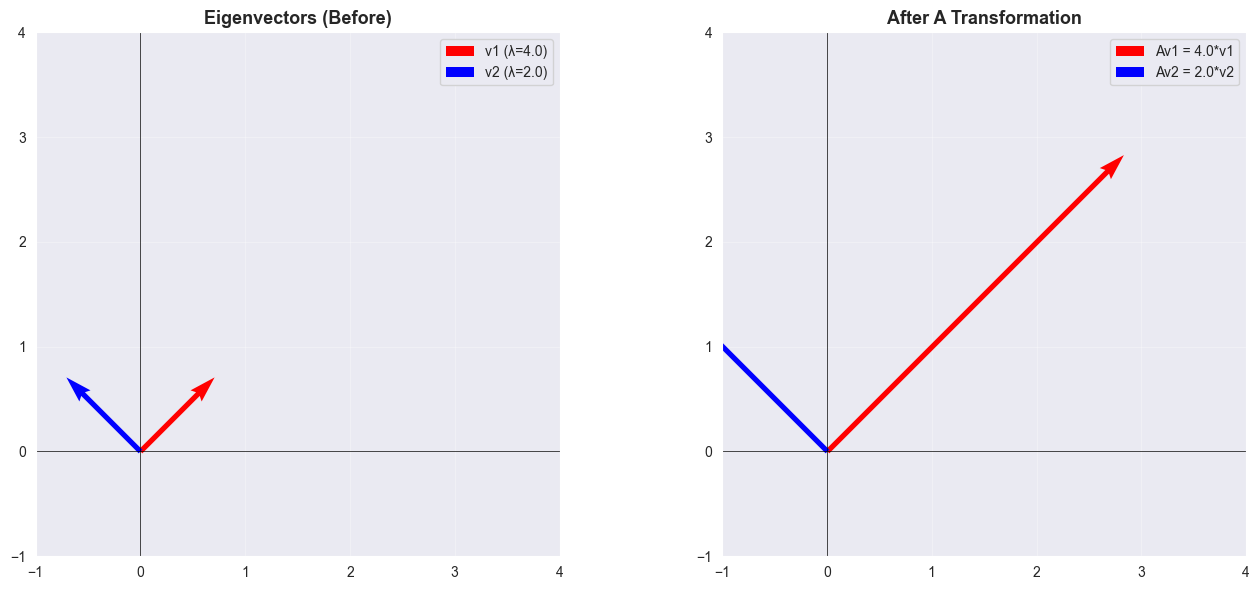

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Before transformation
axes[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01, label=f'v1 (λ={lambda1:.1f})')
v2 = eigenvectors[:, 1]
lambda2 = eigenvalues[1]
axes[0].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.01, label=f'v2 (λ={lambda2:.1f})')
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-1, 4)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Eigenvectors (Before)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Right: After transformation
Av1 = A.dot(v1)
Av2 = A.dot(v2)
axes[1].quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01, label=f'Av1 = {lambda1:.1f}*v1')
axes[1].quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.01, label=f'Av2 = {lambda2:.1f}*v2')
axes[1].set_xlim(-1, 4)
axes[1].set_ylim(-1, 4)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
axes[1].set_title('After A Transformation', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


**Observation**: Eigenvectors stay in same direction, only get scaled!

---
## Covariance Matrix and Variance

For PCA, we use eigendecomposition on the **covariance matrix**.

In [5]:
# Generate correlated 2D data
mean = [0, 0]
cov = [[3, 1], 
       [1, 3]]  # This is our matrix A from earlier!

data = np.random.multivariate_normal(mean, cov, 500)

# Compute covariance matrix
cov_matrix = np.cov(data.T)

print('True covariance:')
print(np.array(cov))
print('\nEstimated covariance:')
print(cov_matrix)

# Eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
print(f'\nEigenvalues (variances): {eigenvals}')
print(f'\nEigenvectors (PC directions):\n{eigenvecs}')


True covariance:
[[3 1]
 [1 3]]

Estimated covariance:
[[2.78276384 0.88631405]
 [0.88631405 2.92585451]]

Eigenvalues (variances): [1.96511216 3.74350619]

Eigenvectors (PC directions):
[[-0.73500361 -0.67806319]
 [ 0.67806319 -0.73500361]]


### Visualize Data with Principal Components

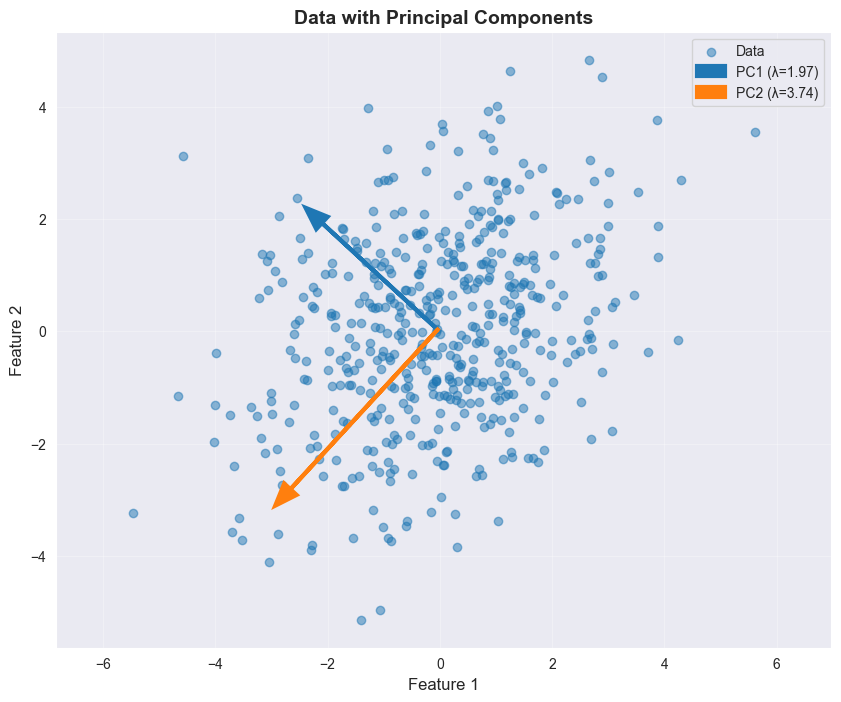

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data')

# Plot eigenvectors scaled by eigenvalues (show variance)
origin = np.mean(data, axis=0)
scale = 2  # For visibility

for i in range(2):
    direction = eigenvecs[:, i] * np.sqrt(eigenvals[i]) * scale
    plt.arrow(origin[0], origin[1], direction[0], direction[1],
             head_width=0.3, head_length=0.4, fc=f'C{i}', ec=f'C{i}',
             linewidth=3, label=f'PC{i+1} (λ={eigenvals[i]:.2f})')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Data with Principal Components', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


### Interpretation:
- **PC1** (larger eigenvalue): Direction of maximum variance
- **PC2** (smaller eigenvalue): Direction of second-most variance
- Eigenvectors are **orthogonal** (perpendicular)

---
## Key Properties

### 1. Eigenvectors are Orthogonal (for symmetric matrices)

In [7]:
# Dot product of eigenvectors
dot_product = eigenvecs[:, 0].dot(eigenvecs[:, 1])
print(f'v1 · v2 = {dot_product:.10f}  (should be ~0)')
print(f'Orthogonal? {np.abs(dot_product) < 1e-10}')


v1 · v2 = 0.0000000000  (should be ~0)
Orthogonal? True


### 2. Eigenvalues Represent Variance in Each Direction

In [8]:
# Project data onto principal components
data_centered = data - np.mean(data, axis=0)
projected = data_centered.dot(eigenvecs)

# Compute variance in each PC direction
var_pc1 = np.var(projected[:, 0])
var_pc2 = np.var(projected[:, 1])

print(f'Eigenvalue 1: {eigenvals[0]:.4f}')
print(f'Variance along PC1: {var_pc1:.4f}')
print(f'\nEigenvalue 2: {eigenvals[1]:.4f}')
print(f'Variance along PC2: {var_pc2:.4f}')


Eigenvalue 1: 1.9651
Variance along PC1: 1.9612

Eigenvalue 2: 3.7435
Variance along PC2: 3.7360


---
## Summary

### Eigendecomposition:
$$A v = \lambda v$$

- **Eigenvector** ($v$): Direction unchanged by transformation
- **Eigenvalue** ($\lambda$): Scaling factor

### For PCA:
1. Compute covariance matrix of data
2. Find eigenvalues and eigenvectors
3. **Eigenvectors** = Principal components (new axes)
4. **Eigenvalues** = Variance along each PC
5. Sort by eigenvalue (descending)
6. Keep top k eigenvectors for dimensionality reduction

### Why It Works:
- Eigenvectors of covariance matrix point in directions of maximum variance
- Data projected onto these directions preserves most information
- Can discard components with small eigenvalues (low variance)

**Interview Tip**: "Eigenvectors of the covariance matrix are the principal components - they're the directions where data varies most. Eigenvalues tell us how much variance each component captures. PCA keeps the top eigenvectors to reduce dimensions while preserving information."